In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("../data/ML/AGAexons_features.csv", sep=",")

In [2]:
#'included' yes no becomes classifier
# Map 'yes' -> 1 and 'no' -> 0
df['induced_encoded'] = df['induced'].map({'yes': 1, 'no': 0})

df.head()

,HbondBulgeGA,induced,PSI,UP50,DOWN50,SF2/ASF_count,SF2/ASF_max_score,SF2/ASF_mean_score,SF2/ASF_IgM_BRCA1_count,SF2/ASF_IgM_BRCA1_max_score,...,SRp55_count,SRp55_max_score,SRp55_mean_score,FAS_hex2_count,FAS_hex2_density,FAS_hex3_count,FAS_hex3_density,log2_FPKM,U1bindingsite,induced_encoded
0,19,no,0.000000,GAUCUGAAAUGAAGACUGAUAAGACAUUCUUGAACUUUUUGAGCUUCCA,ACCCUAGCUGUGCCAGCACAUGUUCAUCUUUACAAUUUAUAUUGUA...,0,0.98,-3.598298,0,1.06,...,0,2.21,-2.191458,0.0,0.000000,0.0,0.000000,1.632450,AAGAGUAUGUAA,0
1,22,no,100.000000,CCCGAUUUGGUGCUUGGAUGACAGACCCUUUAGCAUCUGAGAAAAACAA,CUCCCACAAACACCUUUGCUUAGAAUUAAGUUCUGCUUACACUUUU...,1,2.04,-3.022553,2,2.61,...,1,3.65,-2.160833,0.0,0.000000,0.0,0.000000,2.363028,CAGAGUAUGUUU,0
2,21,no,100.000000,GGUGCCAGGGCACUUCAGGUGGCGAUGGCCCUCCUGGCCCUCCAGGUGA,GAUACAGCCACAUAAUAUAAAAUGAAAAUUAGUAUUUCUGCAAGUA...,1,2.09,-1.974255,2,2.33,...,0,2.40,-2.187083,2.0,0.037736,1.0,0.018868,1.005384,AAGAGUACGUAU,0
3,26,no,100.000000,GUGAAGAUGGUUUUCCAGGAUUCAAAGGUGACAUGGGUCUAAAAGGUGA,AGAGAAAAUGUACACCAGUACACAAAAUUUAAUAUAUAUAUAUAUU...,1,3.32,-2.988723,1,3.21,...,1,3.08,-2.258958,2.0,0.037736,1.0,0.018868,1.005384,CAGAGUAAGUAU,0
4,20,no,99.408284,AAGUAUGACCUCCUGGUUUGGUUUGAGAUCAGUGAACUGGAGCCUACAG,AACUUAAUAAAUUUUUAAAUAAGGCAAAAUGUUUCAAAUUAGGAAA...,1,3.03,-2.975319,2,2.33,...,0,2.34,-2.249583,4.0,0.075472,4.0,0.075472,3.420205,GAGAGUAAGUCC,0


In [3]:
#one hot encoding
import numpy as np
import torch
rna_vocab = ['A', 'C', 'G', 'U']
nt_to_onehot = {nt: np.eye(len(rna_vocab))[i] for i, nt in enumerate(rna_vocab)}

def onehot_flat(seq):
    return torch.tensor(np.vstack([nt_to_onehot[nt] for nt in seq]).flatten(), dtype=torch.float)

# Replace your encoded columns
df['onehot_UP50'] = df['UP50'].apply(onehot_flat)
df['onehot_DOWN50'] = df['DOWN50'].apply(onehot_flat)
df['onehot_U1bindingsite'] = df['U1bindingsite'].apply(onehot_flat)

pd.reset_option("display.max_colwidth")

df.head()

,HbondBulgeGA,induced,PSI,UP50,DOWN50,SF2/ASF_count,SF2/ASF_max_score,SF2/ASF_mean_score,SF2/ASF_IgM_BRCA1_count,SF2/ASF_IgM_BRCA1_max_score,...,FAS_hex2_count,FAS_hex2_density,FAS_hex3_count,FAS_hex3_density,log2_FPKM,U1bindingsite,induced_encoded,onehot_UP50,onehot_DOWN50,onehot_U1bindingsite
0,19,no,0.000000,GAUCUGAAAUGAAGACUGAUAAGACAUUCUUGAACUUUUUGAGCUUCCA,ACCCUAGCUGUGCCAGCACAUGUUCAUCUUUACAAUUUAUAUUGUA...,0,0.98,-3.598298,0,1.06,...,0.0,0.000000,0.0,0.000000,1.632450,AAGAGUAUGUAA,0,"[tensor(0.), tensor(0.), tensor(1.), tensor(0....","[tensor(1.), tensor(0.), tensor(0.), tensor(0....","[tensor(1.), tensor(0.), tensor(0.), tensor(0...."
1,22,no,100.000000,CCCGAUUUGGUGCUUGGAUGACAGACCCUUUAGCAUCUGAGAAAAACAA,CUCCCACAAACACCUUUGCUUAGAAUUAAGUUCUGCUUACACUUUU...,1,2.04,-3.022553,2,2.61,...,0.0,0.000000,0.0,0.000000,2.363028,CAGAGUAUGUUU,0,"[tensor(0.), tensor(1.), tensor(0.), tensor(0....","[tensor(0.), tensor(1.), tensor(0.), tensor(0....","[tensor(0.), tensor(1.), tensor(0.), tensor(0...."
2,21,no,100.000000,GGUGCCAGGGCACUUCAGGUGGCGAUGGCCCUCCUGGCCCUCCAGGUGA,GAUACAGCCACAUAAUAUAAAAUGAAAAUUAGUAUUUCUGCAAGUA...,1,2.09,-1.974255,2,2.33,...,2.0,0.037736,1.0,0.018868,1.005384,AAGAGUACGUAU,0,"[tensor(0.), tensor(0.), tensor(1.), tensor(0....","[tensor(0.), tensor(0.), tensor(1.), tensor(0....","[tensor(1.), tensor(0.), tensor(0.), tensor(0...."
3,26,no,100.000000,GUGAAGAUGGUUUUCCAGGAUUCAAAGGUGACAUGGGUCUAAAAGGUGA,AGAGAAAAUGUACACCAGUACACAAAAUUUAAUAUAUAUAUAUAUU...,1,3.32,-2.988723,1,3.21,...,2.0,0.037736,1.0,0.018868,1.005384,CAGAGUAAGUAU,0,"[tensor(0.), tensor(0.), tensor(1.), tensor(0....","[tensor(1.), tensor(0.), tensor(0.), tensor(0....","[tensor(0.), tensor(1.), tensor(0.), tensor(0...."
4,20,no,99.408284,AAGUAUGACCUCCUGGUUUGGUUUGAGAUCAGUGAACUGGAGCCUACAG,AACUUAAUAAAUUUUUAAAUAAGGCAAAAUGUUUCAAAUUAGGAAA...,1,3.03,-2.975319,2,2.33,...,4.0,0.075472,4.0,0.075472,3.420205,GAGAGUAAGUCC,0,"[tensor(1.), tensor(0.), tensor(0.), tensor(0....","[tensor(1.), tensor(0.), tensor(0.), tensor(0....","[tensor(0.), tensor(0.), tensor(1.), tensor(0...."


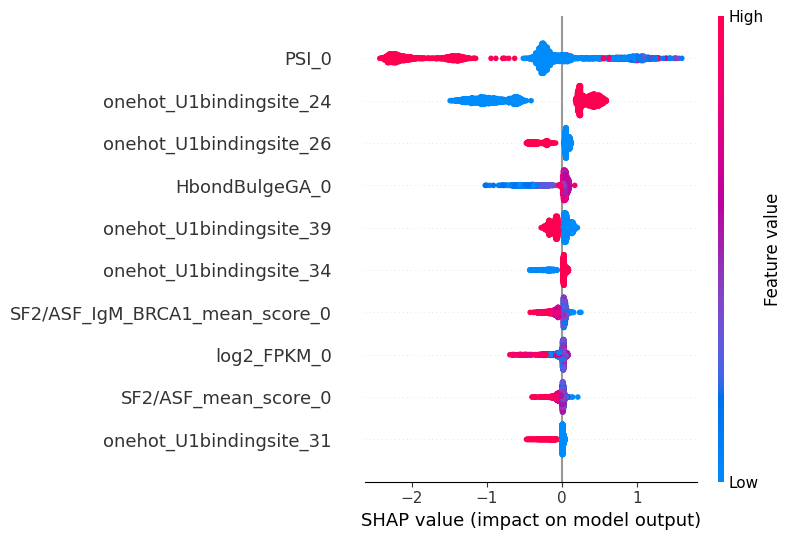

In [7]:
import numpy as np
import shap
from xgboost import XGBClassifier

# select features to be included (here all but also a selection can be made)
feature_columns = [
    "onehot_U1bindingsite", "onehot_UP50", "onehot_DOWN50",
    "HbondBulgeGA", "PSI",
    "SF2/ASF_count", "SF2/ASF_max_score", "SF2/ASF_mean_score",
    "SF2/ASF_IgM_BRCA1_count", "SF2/ASF_IgM_BRCA1_max_score",
    "SF2/ASF_IgM_BRCA1_mean_score", "SC35_count", "SC35_max_score",
    "SC35_mean_score", "SRp40_count", "SRp40_max_score",
    "SRp40_mean_score", "SRp55_count", "SRp55_max_score",
    "SRp55_mean_score", "FAS_hex2_density", "FAS_hex3_density",
    "log2_FPKM"
]

# Flatten rows
flattened_feature_names = []

def flatten_row(row, record_names=False):
    features = []
    for col in feature_columns:
        val = row[col]

        if isinstance(val, list):
            for i, x in enumerate(val):
                features.append(float(x))
                if record_names:
                    flattened_feature_names.append(f"{col}_{i}")

        elif hasattr(val, "numpy") or hasattr(val, "ravel"):
            arr = val.cpu().numpy().ravel() if hasattr(val, "cpu") else val.ravel()
            features.extend(arr.tolist())
            if record_names:
                for i in range(len(arr)):
                    flattened_feature_names.append(f"{col}_{i}")

        elif hasattr(val, "item"):
            features.append(float(val.item()))
            if record_names:
                flattened_feature_names.append(col)

        else:
            features.append(float(val))
            if record_names:
                flattened_feature_names.append(col)

    return features

# Build X and y
X = np.stack(df.apply(lambda r: flatten_row(r, record_names=False), axis=1).values)
y = df["induced_encoded"].values

# record feature names
_ = flatten_row(df.iloc[0], record_names=True)

# Train XGBoost with tuned parameters
clf = XGBClassifier(
    subsample=0.7,
    reg_lambda=1.5,
    reg_alpha=0,
    n_estimators=200,
    max_depth=6,
    learning_rate=0.01,
    gamma=0.2,
    colsample_bytree=0.7,
    scale_pos_weight=2196 / 286,
    eval_metric="logloss",
    random_state=42
)

clf.fit(X, y)

# SHAP analysis
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X)

#Top 10 features 
mean_abs_shap = np.mean(np.abs(shap_values), axis=0)
top10_idx = np.argsort(mean_abs_shap)[-10:]
top10_idx = top10_idx[np.argsort(mean_abs_shap[top10_idx])]

shap_top10 = shap_values[:, top10_idx]
X_top10 = X[:, top10_idx]
feature_names_top10 = [flattened_feature_names[i] for i in top10_idx]

# SHAP summary plot
shap.summary_plot(
    shap_top10,
    X_top10,
    feature_names=feature_names_top10,
    plot_type="dot",
    max_display=10
)
